# Visualise the pre-trained agent in action

Modify the path to the weights and run the notebook.

In [1]:
WEIGHTS = './_output/weights.pth'
METRICS = './_output/metrics.csv'

In [2]:
import sys
import torch
import gymnasium as gym
import matplotlib.pyplot as plt

from DQN import DeepQ

sys.path.append("../")
from utilities.visualisation.plot import graph                                              # noqa
from utilities.visualisation.gif import gif                                                 # noqa

## Parameters

In [3]:
network = {"inputs": 128, "outputs": 5, "nodes": [512, 256, 128]}
optimizer = {"optimizer": torch.optim.RMSprop, "lr": 0.0025}
skip = 4

## Setup

In [4]:
value_agent = DeepQ(
    network=network, optimizer=optimizer,
    exploration_rate=0.001,
)

weights = torch.load(WEIGHTS, map_location=torch.device('cpu'))
value_agent.load_state_dict(weights)

environment = gym.make('ALE/Tetris-ram-v5', render_mode="rgb_array",
                       obs_type="ram", frameskip=1, repeat_action_probability=0.0)
environment.metadata["render_fps"] = 30

A.L.E: Arcade Learning Environment (version 0.8.1+53f58b7)
[Powered by Stella]


## Visualise

### Plotting the metrics from the csv-file created during training.

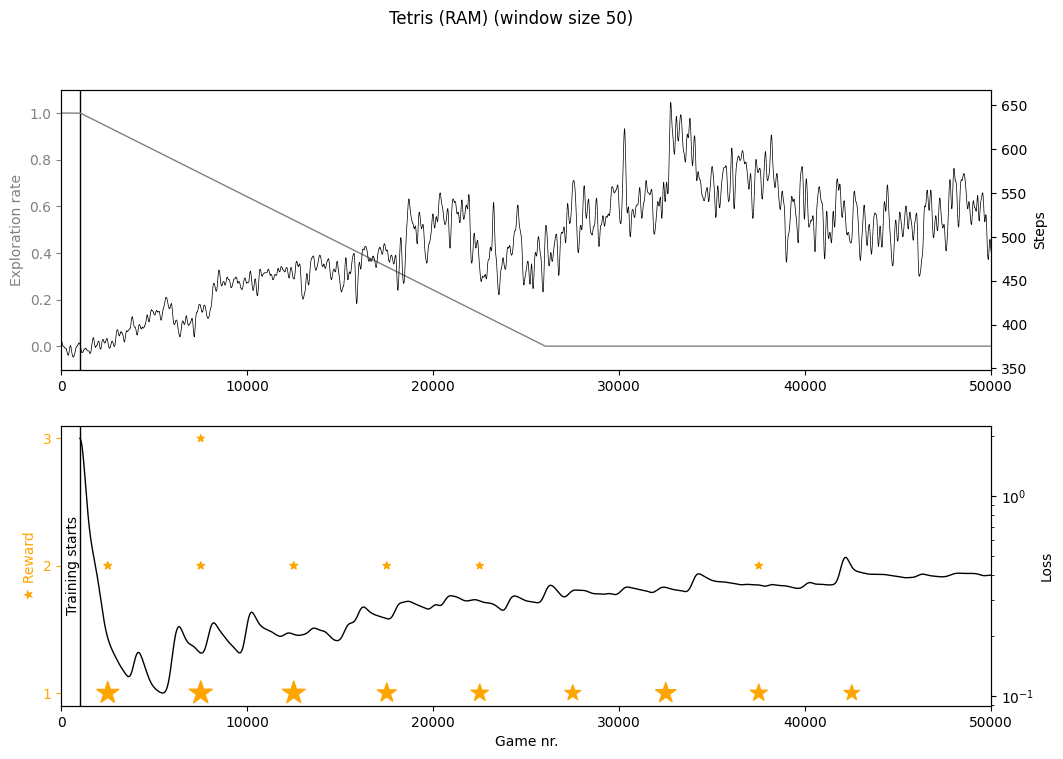

In [5]:
graph(METRICS, title="Tetris (RAM)", window=50) if METRICS else None
plt.savefig('./_output/metrics.png') if METRICS else None
plt.show() if METRICS else None

### Creating and saving a gif of the agent in action. The gif will be saved to the given path.

In [6]:
gif(environment, value_agent, './_output/tetris.gif', skip)